In [1]:
# !pip install pandas matplotlib numpy seaborn

In [22]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

Exercicio seção 1

Tabela de fisioterapia

In [23]:
df = pd.DataFrame({
    "Paciente": list(range(1, 16)),
    "Fisioterapia": [7, 8, 5, 6, 4, 5, 7, 7, 6, 8, 6, 5, 5, 4, 5],
    "Sequelas": ["S", "S", "N", "N", "N", "S", "S", "N", "N", "S", "S", "N", "S", "N", "N"],
    "Cirurgia": ["A", "M", "A", "M", "M", "B", "A", "M", "B", "M", "B", "B", "M", "M", "A"]
})

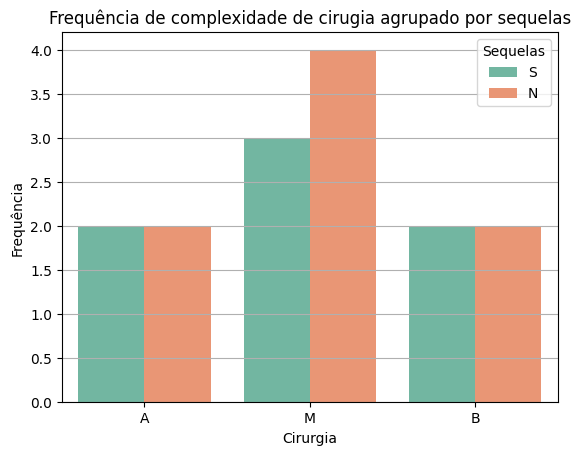

In [24]:
cross_tab = pd.crosstab(df["Cirurgia"], df["Sequelas"])
# cross_tab.plot(kind='bar', stacked=False)
plt.grid()
sns.countplot(data=df, x="Cirurgia", hue="Sequelas", palette="Set2")
plt.ylabel("Frequência")
plt.xlabel("Cirurgia")
plt.title("Frequência de complexidade de cirugia agrupado por sequelas")
plt.savefig("FrequenciaCirurgiaSequela.pdf",bbox_inches='tight')

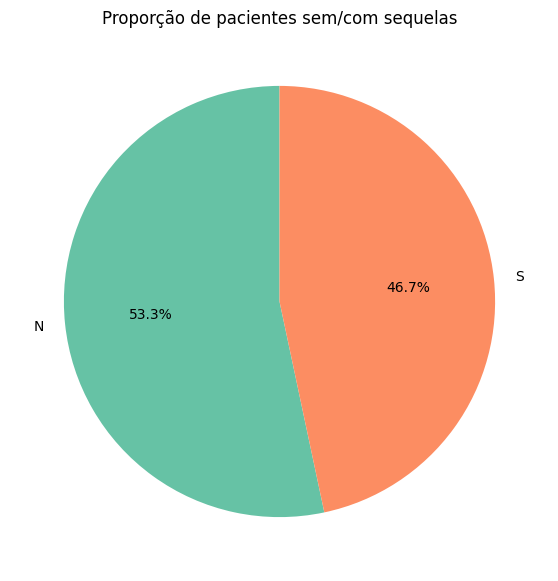

In [25]:
# Gráfico de Setores (Pizza) com Seaborn + Matplotlib
sequelas_counts = df["Sequelas"].value_counts()

# Plotando a pizza
plt.figure(figsize=(7, 7))
plt.pie(sequelas_counts, labels=sequelas_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(sequelas_counts)))
plt.title("Proporção de pacientes sem/com sequelas")
plt.ylabel("")  # Remove o label y
plt.savefig("ProporcaoPacienteSemComSequela.pdf",bbox_inches='tight')
plt.show()

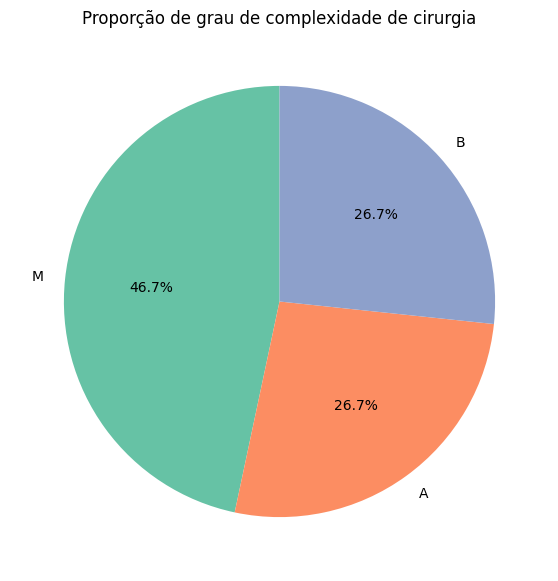

In [26]:
# Gráfico de Setores (Pizza) com Seaborn + Matplotlib
sequelas_counts = df["Cirurgia"].value_counts()

# Plotando a pizza
plt.figure(figsize=(7, 7))
plt.pie(sequelas_counts, labels=sequelas_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", len(sequelas_counts)))
plt.title("Proporção de grau de complexidade de cirurgia")
plt.ylabel("")  # Remove o label y
plt.savefig("ProporcaoGrauComplexidadeCirurgia.pdf",bbox_inches='tight')
plt.show()

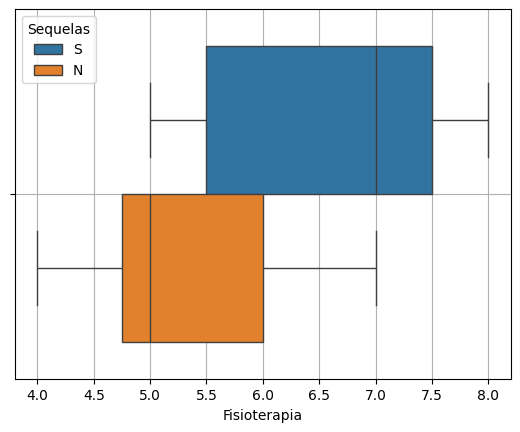

In [27]:
sns.boxplot(data=df,x='Fisioterapia',hue="Sequelas")
plt.grid()
plt.show()

In [28]:
cross_tab_margin = pd.crosstab(df["Cirurgia"], df["Sequelas"],margins=True)
display(cross_tab_margin)

Sequelas,N,S,All
Cirurgia,,,
A,2,2,4
B,2,2,4
M,4,3,7
All,8,7,15


In [29]:
df = pd.read_csv("https://drive.google.com/uc?id=19qbY3djYikS-okhQVPFDR1nIi6KTuv8i")

(a) Com base nas informações do arquivo, construa um novo banco de dados adicio-
nando 6 indivíduos escolhidos ao acaso. Use set.seed(numero_email) e imprima
os valores sorteados.

In [30]:
numero_email = 48
df = df.sample(n=6,random_state=numero_email)
display(df.head(6))


,Pac_No,Idade,Diag,Recup,Tratam,Coag
22,23,75,30,22,III,sim
11,20,24,3,1,II,nao
3,7,15,53,46,I,sim
1,4,15,52,45,I,nao
15,18,31,9,3,II,sim
10,16,40,20,11,III,sim


(b) No computador, crie uma nova planilha veneno123 com os dados apresentados e
salve em CSV.

In [31]:
df.to_csv("veneno123.csv",index=False)

(c) Considerando essa nova planilha:
i. Classifique cada uma das variáveis.

In [32]:
for i in df.columns:
    print(i)

Pac_No
Idade
Diag
Recup
Tratam
Coag


ii. Construa uma tabela de distribuição de frequência para a variável Diag, usando
k classes pelo método de Sturges.

Amplitude total: 45
H: 15
Bins: [1, 16, 31, 46]
Frequencia: Recup
[1, 16)     3
[16, 31)    1
[31, 46)    1
Name: count, dtype: int64
  Intervalo  Frequência
0   [1, 16)           3
1  [16, 31)           1
2  [31, 46)           1


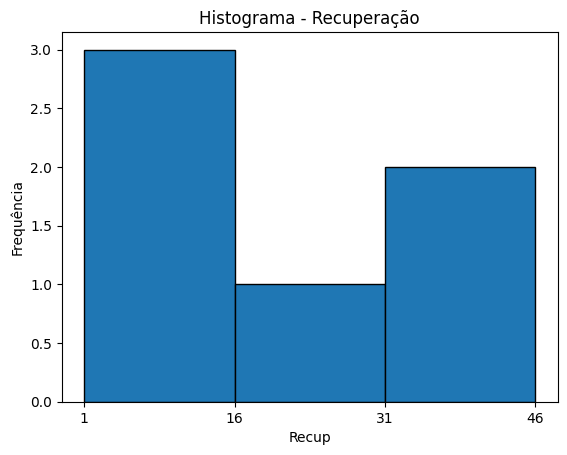

In [ ]:
# 1. Número de classes (Sturges), nao possui implementacao em python
n = len(df["Recup"])
k = int(1 + 3.3 * math.log10(n))

# 2. Amplitude total
amplitude_total = df["Recup"].max() - df["Recup"].min()
print(f"Amplitude total: {amplitude_total}")

# 3. Amplitude de cada classe
h = math.ceil(amplitude_total / k)
print(f"H: {h}")

# 4. Criar os intervalos de classe
bins = list(range(df["Recup"].min(), df["Recup"].max() + h, h))
print(f"Bins: {bins}")

# 5. Frequência
frequencia = pd.cut(df["Recup"], bins=bins, right=False).value_counts().sort_index()
print(f"Frequencia: {frequencia}")

# 6. Exibir tabela de frequência
freq_df = pd.DataFrame({
    "Intervalo": frequencia.index.astype(str),
    "Frequência": frequencia.values
})

print(freq_df)

plt.hist(df["Recup"], bins=bins, edgecolor="black")
plt.title("Histograma - Recuperação")
plt.xlabel("Recup")
plt.ylabel("Frequência")
plt.xticks(bins)
plt.show()

<Axes: xlabel='Recup', ylabel='Count'>

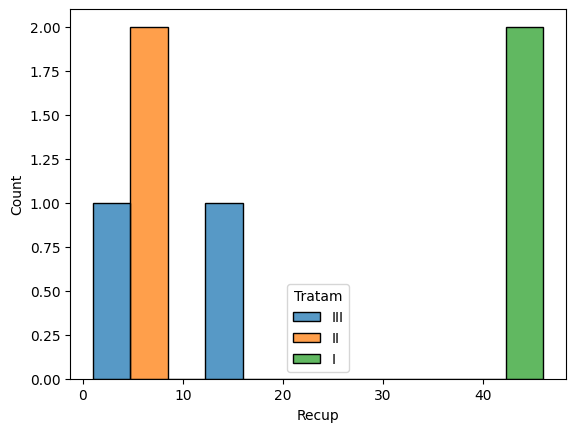

In [48]:
sns.histplot(data=df,x="Recup",hue="Tratam",multiple="dodge")